<p align="center"> <img src="https://i.imgur.com/RdmUiGo.jpg"> </p> 

### New York City Taxi Trip Prediction

The goal of this project is to predict the duration of taxi rides in NYC. The NYC taxi trip duration dataset is from Kaggle competition. The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC).

The Dataset contains three files:
* train.csv - the training set (contains 1458644 trip records)
* test.csv - the testing set (contains 625134 trip records)
* sample_submission.csv - a sample submission file in the correct format

Data fields:

* **id** - a unique identifier for each trip
* **vendor_id** - a code indicating the provider associated with the trip record
* **pickup_datetime** - date and time when the meter was engaged
* **dropoff_datetime** - date and time when the meter was disengaged
* **passenger_count** - the number of passengers in the vehicle (driver entered value)
* **pickup_longitude** - the longitude where the meter was engaged
* **pickup_latitude** - the latitude where the meter was engaged
* **dropoff_longitude** - the longitude where the meter was disengaged
* **dropoff_latitude** - the latitude where the meter was disengaged
* **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* **trip_duration** - duration of the trip in seconds

Here is an outline of the steps we'll follow:

* Download the dataset from Kaggle
* Data preparation and cleaning
* Feature Engineering
* Exploratory Data Analysis
* Prepare data for machine learning
* Predicting the trip duration using machine learning
* Conclusion and future work

# Packages and Libraries

In this section, we will install and import the necessary libraries we will use in the project.

In [112]:
# install and import the libraries
!pip install pandas-profiling numpy matplotlib seaborn plotly --quiet
!pip install opendatasets scikit-learn --quiet
!pip install geopandas --quiet

import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import folium
import os
import calendar
import opendatasets
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

     |████████████████████████████████| 1.0 MB 15.5 MB/s 
     |████████████████████████████████| 6.3 MB 43.1 MB/s 
     |████████████████████████████████| 16.7 MB 51.2 MB/s 


# Dataset Download

Here we are going to download Kaggle dataset using opendatasets library. opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

In [3]:
od.download('https://www.kaggle.com/c/nyc-taxi-trip-duration/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darshandes
Your Kaggle Key: ··········


100%|██████████| 85.8M/85.8M [00:01<00:00, 55.8MB/s]



Extracting archive ./nyc-taxi-trip-duration/nyc-taxi-trip-duration.zip to ./nyc-taxi-trip-duration


The dataset is downloaded and extracted to the folder nyc-taxi-trip-duration.

In [4]:
os.listdir('nyc-taxi-trip-duration')

['train.zip', 'test.zip', 'sample_submission.zip']

## Data Preparation and Cleaning
- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values

Let's create dataframe of training and test datasets.

In [5]:
sample_fraction = 0.01
import random

def skip_row(row_idx):
  if row_idx ==0:
    return False
  return random.random() > sample_fraction
random.seed(42)
# creating pandas dataframe
train_df = pd.read_csv('./nyc-taxi-trip-duration/train.zip', low_memory=False)
test_df = pd.read_csv('./nyc-taxi-trip-duration/test.zip', low_memory=False)

In [6]:
# Preview of the training dataset
train_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
test_df.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


The training dataset contains over 1.4 million rows of data.
Let's view some basic information about the training dataset.

In [8]:
train_df.shape #Return a tuple representing the dimensionality of the DataFrame.

(1458644, 11)

In [9]:
train_df.info() #Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


It appears that there are no null values.

In [10]:
# converting 'datetime' columns to datetime object
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'], format= '%Y-%m-%d %H:%M:%S')

In [11]:
train_df.duplicated().sum() #Checking how many duplicate records are in total

0

Dataset does not contain any duplicate records.

Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [12]:
round(train_df.describe().T,5)

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.53495,0.49878,1.00000,1.00000,2.00000,2.00000,2.000000e+00
passenger_count,1458644.0,1.66453,1.31424,0.00000,1.00000,1.00000,2.00000,9.000000e+00
pickup_longitude,1458644.0,-73.97349,0.07090,-121.93334,-73.99187,-73.98174,-73.96733,-6.133553e+01
pickup_latitude,1458644.0,40.75092,0.03288,34.35970,40.73735,40.75410,40.76836,5.188108e+01
dropoff_longitude,1458644.0,-73.97342,0.07064,-121.93330,-73.99133,-73.97975,-73.96301,-6.133553e+01
dropoff_latitude,1458644.0,40.75180,0.03589,32.18114,40.73588,40.75452,40.76981,4.392103e+01
trip_duration,1458644.0,959.49227,5237.43172,1.00000,397.00000,662.00000,1075.00000,3.526282e+06


Now, let's view some basic information about the test dataset.

In [13]:
# Preview of the test dataset
test_df.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


The test dataset contains over 600k rows and 9 columns.

In [14]:
test_df.shape #Return a tuple representing the dimensionality of the DataFrame.

(625134, 9)

In [15]:
test_df.info() #Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


It appears there are no null values.

In [16]:
#Converting 'datetime' columns to datetime object
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')

In [17]:
test_df.duplicated().sum() #Checking how many duplicate records are in total

0

Dataset does not contain any duplicate records.

In [18]:
round(test_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
vendor_id,625134.0,1.53,0.50,1.00,1.00,2.00,2.00,2.00
passenger_count,625134.0,1.66,1.31,0.00,1.00,1.00,2.00,9.00
pickup_longitude,625134.0,-73.97,0.07,-121.93,-73.99,-73.98,-73.97,-69.25
pickup_latitude,625134.0,40.75,0.03,37.39,40.74,40.75,40.77,42.81
dropoff_longitude,625134.0,-73.97,0.07,-121.93,-73.99,-73.98,-73.96,-67.50
dropoff_latitude,625134.0,40.75,0.04,36.60,40.74,40.75,40.77,48.86


## Preparing data for Machine Learning

#### Split Training and Validation Set
 We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

In [19]:
from sklearn.model_selection import train_test_split #importing the required library

In [20]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [21]:
len(train_df), len(val_df)

(1166915, 291729)

In [22]:
train_df.head(3) #df sample view

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1053743,id0458976,2,2016-06-29 18:21:02,2016-06-29 18:39:55,1,-73.862762,40.768822,-73.891701,40.746689,N,1133
273748,id0434613,2,2016-04-25 13:03:26,2016-04-25 13:18:13,1,-73.958038,40.783237,-73.975510,40.760853,N,887
433988,id3809234,2,2016-05-07 12:36:09,2016-05-07 12:47:35,1,-73.969460,40.785519,-73.989243,40.771748,N,686


In [23]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#### Input and Target columns
Let's identify input and target columns.

In [24]:
input_cols = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',]

In [25]:
target_col = 'trip_duration'

Let's seperate out numeric and categorical columns.

In [26]:
train_df[input_cols].nunique()

vendor_id                2
passenger_count         10
pickup_longitude     21903
pickup_latitude      43487
dropoff_longitude    31840
dropoff_latitude     59717
dtype: int64

#### Training

In [27]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [28]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [29]:
test_inputs = test_df[input_cols].copy() #Test data does not have targets

Let's seperate out numeric and categorical columns.

In [30]:
numeric_cols = ['pickup_latitude','passenger_count', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude']
categorical_cols = ['vendor_id']

## Train & Evaluate Hardcoded Model
Let's create a simple model that always predicts the average.

In [31]:
class MeanRegressor:
  def fit(self, inputs, targets):
      self.mean = targets.mean()

  def predict(self, inputs):
      return np.full(inputs.shape[0], self.mean)


In [32]:
mean_model = MeanRegressor()

In [33]:
mean_model.fit(train_inputs, train_targets)

In [34]:
mean_model.mean

959.2735854796622

In [35]:
train_preds = mean_model.predict(train_inputs)

In [36]:
train_preds

array([959.27358548, 959.27358548, 959.27358548, ..., 959.27358548,
       959.27358548, 959.27358548])

In [37]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([959.27358548, 959.27358548, 959.27358548, ..., 959.27358548,
       959.27358548, 959.27358548])

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
def rmse(targets, preds):
  return np.sqrt(mean_squared_error(targets, preds, squared=False))


In [40]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

74.9998567639936

In [41]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

57.048322937594996

The Root Mean Squaredd Error(RMSE) for our model is approximately 57.048

## Train & Evaluate Baseline Model
We'll train a linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linear_model = LinearRegression()

In [44]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [45]:
train_preds = linear_model.predict(train_inputs)
train_preds

array([1202.11909153,  949.2142413 ,  904.21598042, ...,  946.79415097,
        782.31176582, 1245.06653039])

In [46]:
rmse(train_targets, train_preds)

74.96529593980529

In [47]:
val_preds = linear_model.predict(val_inputs)

In [48]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

56.96961831199922

The Root Mean Squaredd Error(RMSE) for our base model is approximately 56.969,
which isn't much better than simply predicting the average.

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

### Make predictions and submit to Kaggle

* Make predictions for test set
* Generate submissions CSV
* submit to kaggle
* Record in experiment tracking sheet

In [49]:
test_preds = linear_model.predict(test_inputs)
test_preds

array([ 886.35773134, 1290.67316578,  884.52765092, ...,  751.09267343,
        567.34330793, 1127.63056699])

In [50]:
sub_df = pd.read_csv('./nyc-taxi-trip-duration/sample_submission.zip', low_memory=False)

In [51]:
sub_df

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


In [52]:
sub_df['trip_duration'] = test_preds
sub_df

,id,trip_duration
0,id3004672,886.357731
1,id3505355,1290.673166
2,id1217141,884.527651
3,id2150126,1057.725336
4,id1598245,799.040486
...,...,...
625129,id3008929,921.537294
625130,id3700764,720.942997
625131,id2568735,751.092673
625132,id1384355,567.343308


In [53]:
sub_df.to_csv('linear_model_submission.csv', index=None)

![Imgur](https://i.imgur.com/uai3YaP.png)

This puts us at position ~1163 out of 1254.

## Feature Engineering

* Extract part of date
* Remove outliers & invalid data
* Add distance between pickup & drop
* Add distance from landmarks

Extract Parts of Date

* Year
* Month
* Day
* weekday
* Hour

In [54]:
def add_dateparts(df, col):
  df[col + '_year'] = df[col].dt.year 
  df[col + '_month'] = df[col].dt.month
  df[col + '_day'] = df[col].dt.day
  df[col + '_weekday'] = df[col].dt.weekday
  df[col + '_hour'] = df[col].dt.hour
  df[col + '_week'] = df[col].dt.week
  df[col + '_minute'] = df[col].dt.minute
  df[col + '_minute_oftheday'] = df['pickup_datetime_hour']*60 + df['pickup_datetime_minute']
  df[col + '_day_of_week'] = df[col].apply(lambda x: calendar.day_name[x.weekday()])

In [55]:
add_dateparts(train_df, 'pickup_datetime')
add_dateparts(train_df, 'dropoff_datetime')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [56]:
add_dateparts(val_df, 'pickup_datetime')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [57]:
add_dateparts(test_df, 'pickup_datetime')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


#### Add distance Between Pickup and Drop

We can use the haversine distance


In [58]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [59]:
def add_trip_distance(df):
  df['trip_distance'] = haversine_np(df['pickup_longitude'], 
                                     df['pickup_latitude'], 
                                     df['dropoff_longitude'], 
                                     df['dropoff_latitude'])

In [60]:
add_trip_distance(train_df)

In [61]:
add_trip_distance(val_df)
add_trip_distance(test_df)

#### Add distance From Popular Landmarks

* JFK Airport
* LGA Airport
* EWR Airport
* Times Square
* Met Meuseum
* World Trade Center

We'll add the distance from drop location.

In [62]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [63]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
  lon, lat = landmark_lonlat
  df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [64]:
def add_landmarks(a_df):
  landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]
  for name, lonlat in landmarks:
    add_landmark_dropoff_distance(a_df, name, lonlat)

In [65]:
add_landmarks(train_df)

In [66]:
add_landmarks(val_df)
add_landmarks(test_df)

In [67]:
#Function aiming at calculating the direction
def ft_degree(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371 #km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

#Add direction feature
train_df['direction'] = ft_degree(train_df['pickup_latitude'].values,
                                train_df['pickup_longitude'].values,
                                train_df['dropoff_latitude'].values,
                                train_df['dropoff_longitude'].values)
val_df['direction'] = ft_degree(val_df['pickup_latitude'].values,
                                  val_df['pickup_longitude'].values, 
                                  val_df['dropoff_latitude'].values,
                                  val_df['dropoff_longitude'].values)
test_df['direction'] = ft_degree(test_df['pickup_latitude'].values,
                                  test_df['pickup_longitude'].values, 
                                  test_df['dropoff_latitude'].values,
                                  test_df['dropoff_longitude'].values)

In [68]:
#adding trip duration column to train_df
train_df['trip_duration_in_hour'] = train_df['trip_duration'].apply(lambda x : x/3600) #adding a column to show trip duration in hour

In [69]:
train_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,pickup_datetime_week,pickup_datetime_minute,pickup_datetime_minute_oftheday,pickup_datetime_day_of_week,dropoff_datetime_year,dropoff_datetime_month,dropoff_datetime_day,dropoff_datetime_weekday,dropoff_datetime_hour,dropoff_datetime_week,dropoff_datetime_minute,dropoff_datetime_minute_oftheday,dropoff_datetime_day_of_week,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,direction,trip_duration_in_hour
1053743,id0458976,2,2016-06-29 18:21:02,2016-06-29 18:39:55,1,-73.862762,40.768822,-73.891701,40.746689,N,1133,2016,6,29,2,18,26,21,1101,Wednesday,2016,6,29,2,18,26,39,1101,Wednesday,3.461603,15.125099,3.672956,24.651954,7.030586,10.650063,-135.267311,0.314722
273748,id0434613,2,2016-04-25 13:03:26,2016-04-25 13:18:13,1,-73.958038,40.783237,-73.975510,40.760853,N,887,2016,4,25,0,13,17,3,783,Monday,2016,4,25,0,13,17,18,783,Monday,2.889549,21.285939,8.727240,18.539309,2.306770,6.094035,-149.407524,0.246389
433988,id3809234,2,2016-05-07 12:36:09,2016-05-07 12:47:35,1,-73.969460,40.785519,-73.989243,40.771748,N,686,2016,5,7,5,12,18,36,756,Saturday,2016,5,7,5,12,18,47,756,Saturday,2.261216,22.945473,9.714973,18.080544,2.350738,6.799002,-132.584856,0.190556
1442481,id1203705,1,2016-05-14 18:44:17,2016-05-14 18:57:55,1,-73.981743,40.736549,-73.998352,40.726440,N,818,2016,5,14,5,18,19,44,1124,Saturday,2016,5,14,5,18,19,57,1124,Saturday,1.793903,20.832595,11.875452,15.395649,6.587206,1.819742,-128.765563,0.227222
1025834,id1896645,2,2016-04-10 22:51:25,2016-04-10 23:07:16,1,-73.977913,40.752609,-73.975647,40.733139,N,951,2016,4,10,6,22,14,51,1371,Sunday,2016,4,10,6,23,14,7,1371,Sunday,2.172024,19.525536,9.841802,17.437932,5.246439,3.678471,174.960275,0.264167


In [70]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,pickup_datetime_week,pickup_datetime_minute,pickup_datetime_minute_oftheday,dropoff_datetime_year,dropoff_datetime_month,dropoff_datetime_day,dropoff_datetime_weekday,dropoff_datetime_hour,dropoff_datetime_week,dropoff_datetime_minute,dropoff_datetime_minute_oftheday,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,direction,trip_duration_in_hour
count,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1166915.0,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1166915.0,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06,1.166915e+06
mean,1.535103e+00,1.663856e+00,-7.397352e+01,4.075091e+01,-7.397344e+01,4.075179e+01,9.592736e+02,2016.0,3.515799e+00,1.551026e+01,3.049499e+00,1.360376e+01,1.383737e+01,2.958020e+01,8.458060e+02,2016.0,3.516153e+00,1.551088e+01,3.053449e+00,1.359720e+01,1.383656e+01,2.963125e+01,8.458060e+02,3.438290e+00,2.088042e+01,9.643936e+00,1.859767e+01,4.502363e+00,6.110914e+00,-1.565125e+01,2.664649e-01
std,4.987665e-01,1.313605e+00,7.629361e-02,3.341554e-02,7.595867e-02,3.615595e-02,5.624981e+03,0.0,1.681257e+00,8.703761e+00,1.954207e+00,6.402326e+00,8.566999e+00,1.732193e+01,3.844810e+02,0.0,1.681439e+00,8.703723e+00,1.956700e+00,6.485592e+00,8.564207e+00,1.741469e+01,3.844810e+02,4.337705e+00,6.594750e+00,6.527212e+00,6.826073e+00,6.903055e+00,6.989620e+00,1.044789e+02,1.562495e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.670159e-01,1.043229e-01,2.715898e-01,3.031975e-02,2.212259e-03,-1.799927e+02,2.777778e-04
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073733e+01,-7.399133e+01,4.073587e+01,3.970000e+02,2016.0,2.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00,7.000000e+00,1.500000e+01,5.730000e+02,2016.0,2.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00,7.000000e+00,1.500000e+01,5.730000e+02,1.230795e+00,2.050598e+01,8.222452e+00,1.653090e+01,2.091814e+00,3.683872e+00,-1.252300e+02,1.102778e-01
50%,2.000000e+00,1.000000e+00,-7.398176e+01,4.075408e+01,-7.397977e+01,4.075452e+01,6.620000e+02,2016.0,4.000000e+00,1.500000e+01,3.000000e+00,1.400000e+01,1.300000e+01,3.000000e+01,8.860000e+02,2016.0,4.000000e+00,1.500000e+01,3.000000e+00,1.400000e+01,1.300000e+01,3.000000e+01,8.860000e+02,2.092311e+00,2.118440e+01,9.468160e+00,1.805157e+01,3.680522e+00,5.604706e+00,8.276631e+00,1.838889e-01
75%,2.000000e+00,2.000000e+00,-7.396736e+01,4.076833e+01,-7.396305e+01,4.076979e+01,1.075000e+03,2016.0,5.000000e+00,2.300000e+01,5.000000e+00,1.900000e+01,2.000000e+01,4.500000e+01,1.168000e+03,2016.0,5.000000e+00,2.300000e+01,5.000000e+00,1.900000e+01,2.000000e+01,4.500000e+01,1.168000e+03,3.873586e+00,2.192190e+01,1.095512e+01,2.003276e+01,5.895748e+00,7.871478e+00,5.341755e+01,2.986111e-01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,2016.0,6.000000e+00,3.100000e+01,6.000000e+00,2.300000e+01,5.300000e+01,5.900000e+01,1.439000e+03,2016.0,7.000000e+00,3.100000e+01,6.000000e+00,2.300000e+01,5.300000e+01,5.900000e+01,1.439000e+03,1.240130e+03,4.121549e+03,4.110759e+03,4.087726e+03,4.103334e+03,4.100864e+03,1.800000e+02,9.795228e+02


## Save intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our wrok from this point.

In [71]:
train_df.to_parquet('train.parquet')

In [72]:
val_df.to_parquet('val.parquet')

In [73]:
test_df.to_parquet('test.parquet')

## Exploratory Analysis and Visualization

Let's explore the training data by visualizing the distribution of values in some columns of the dataset, and the relationships between "trip duration" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

#### Trip_duration

Trip duration is a numeric column. The minumun duration is 1 and maximum duration is 3526282. Thus, we can visualize the distribution of trip duration using a histogram and box plot. We'll us plotly to make the chart interactive. we can also use Seaborn to create similer charts.

In [93]:
def ecdf(x):
    """Empirical cumulative distribution function of a variable"""
    # Sort in ascending order
    x = np.sort(x)
    n = len(x)
    
    # Go from 1/n to 1
    y = np.arange(1, n + 1, 1) / n
    
    return x, y

Below is an example of the ecdf. This plot is good for viewing outliers and also the percentiles of a distribution.


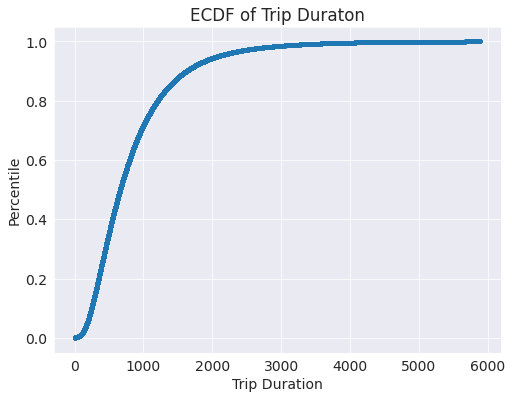

In [94]:
xs, ys = ecdf(train_df['trip_duration'])
plt.figure(figsize = (8, 6))
plt.plot(xs, ys, '.')
plt.ylabel('Percentile'); plt.title('ECDF of Trip Duraton'); plt.xlabel('Trip Duration');

As seen in the chart above, nearly 95 percentile of records have a trip duration of less than 2000.

There are few outliers in the data. Let's check the data where trip duration exceeds 86400 (24 hours).

In [75]:
outliers = train_df.loc[train_df['trip_duration'] > 86400]
outliers

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,pickup_datetime_week,pickup_datetime_minute,pickup_datetime_minute_oftheday,pickup_datetime_day_of_week,dropoff_datetime_year,dropoff_datetime_month,dropoff_datetime_day,dropoff_datetime_weekday,dropoff_datetime_hour,dropoff_datetime_week,dropoff_datetime_minute,dropoff_datetime_minute_oftheday,dropoff_datetime_day_of_week,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,direction,trip_duration_in_hour
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,2016,1,5,1,6,1,14,374,Tuesday,2016,1,31,6,1,4,1,374,Sunday,1.634101,19.938587,10.862999,16.477206,6.046283,2.652135,-174.969924,618.781111
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,2016,2,13,5,22,6,46,1366,Saturday,2016,3,25,4,18,12,18,1366,Friday,19.888167,20.757725,9.264151,17.850491,3.483762,4.955181,-55.358997,979.522778
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,2016,2,13,5,22,6,38,1358,Saturday,2016,3,8,1,15,10,57,1358,Tuesday,5.978731,21.840816,9.508520,17.796240,2.818948,5.674984,-62.618646,569.327222
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,2016,1,5,1,0,1,19,19,Tuesday,2016,1,27,2,11,4,8,19,Wednesday,20.136014,21.002412,6.981570,20.550251,0.883951,8.072112,-44.316302,538.815556


There are 4 records where trip duration exceeds 24 hours. These are outliers. Trip duration is very high for these records with little distance travelled. Let's take log transformation.

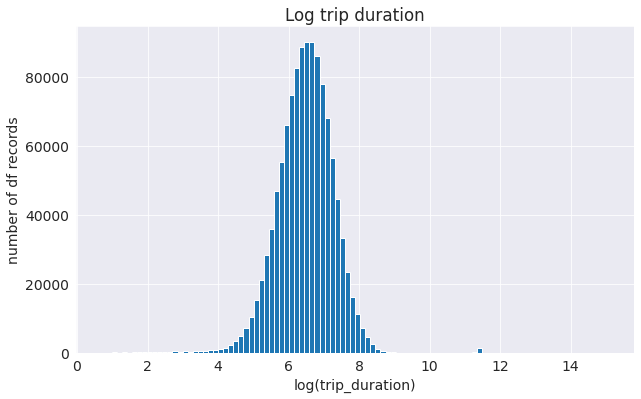

In [76]:
train_df['log_trip_duration'] = np.log(train_df['trip_duration'].values + 1)
plt.hist(train_df['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of df records')
plt.title('Log trip duration')
plt.show()

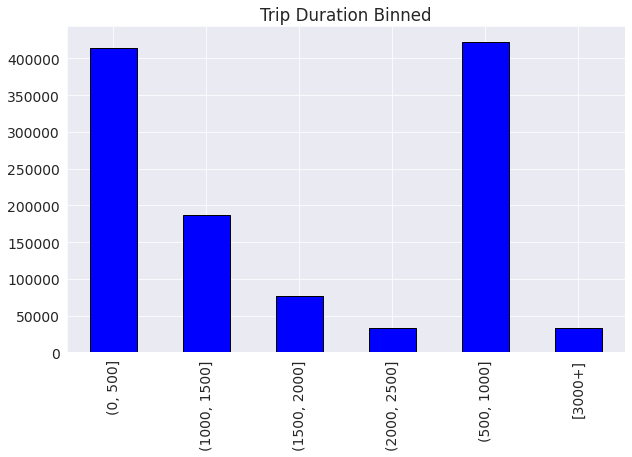

In [107]:
# Bin the trip duration and convert to string
train_df['duration-bin'] = pd.cut(train_df['trip_duration'], bins = list(range(0, 3000, 500))).astype(str)

# Uppermost bin
train_df.loc[train_df['duration-bin'] == 'nan', 'duration-bin'] = '[3000+]'

# Adjust bin so the sorting is correct
train_df.loc[train_df['duration-bin'] == '(5, 10]', 'duration-bin'] = '(05, 10]'

# Bar plot of value counts
train_df['duration-bin'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Trip Duration Binned');

We can see from our trip duration bins that the majority of trips fall into the 500 to 1000 category, followed by 0 to 500 and 1000 to 1500. These could be short trips within the Manhattan metropolitan area.

#### GeoSpatial Analayis

Now, let's plot the locations of pickups and drop-offs using a scatter plot and see if we can identify any locations with a distinct trend.

In [108]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

BB = (-74.5, -72.8, 40.5, 41.8)
def plot_hires(train_df, BB, figsize=(12, 12), ax=None, c=('b', 'y')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(train_df, BB)
    ax.scatter(train_df[idx].pickup_longitude, train_df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(train_df[idx].dropoff_longitude, train_df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

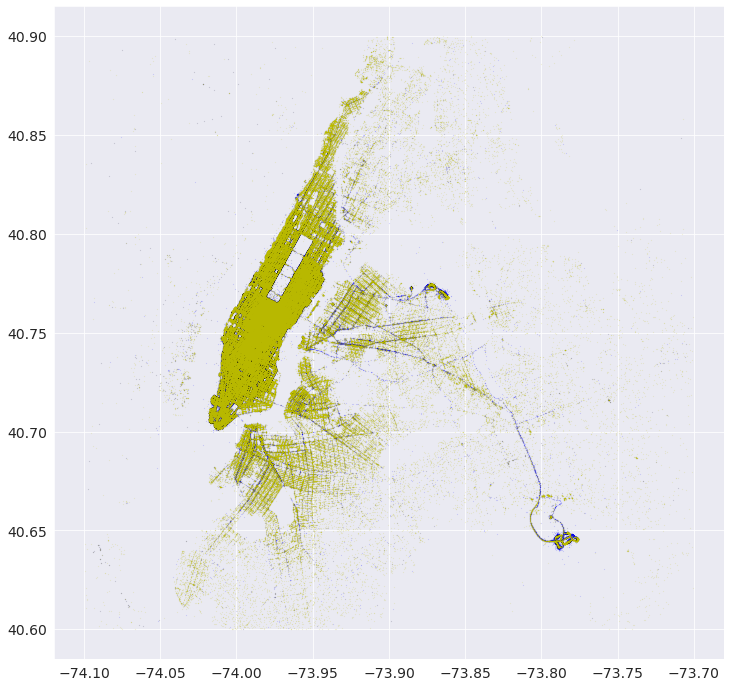

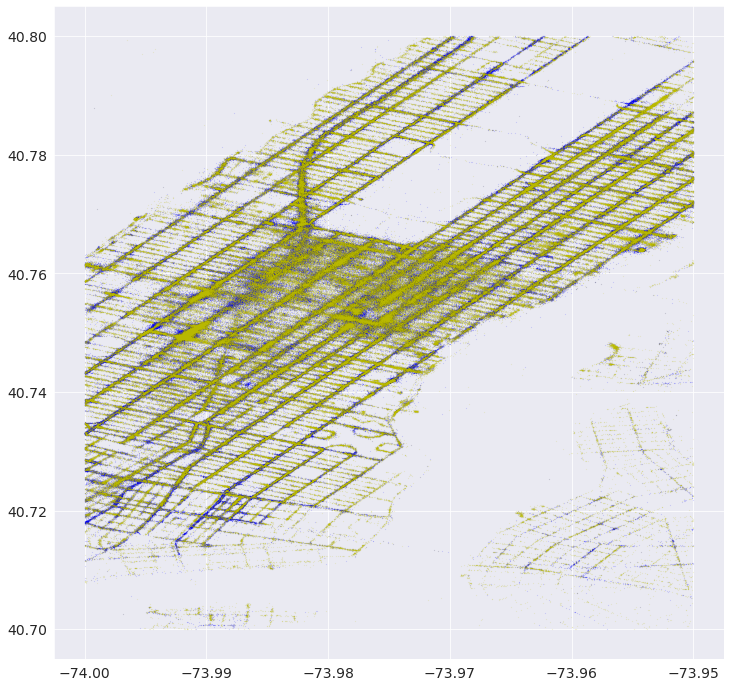

In [110]:
plot_hires(train_df, (-74.1, -73.7, 40.6, 40.9))
plot_hires(train_df, (-74, -73.95, 40.7, 40.8))

A blue dot indicates a pickup, a yellow dot indicates a drop off, and a green dot indicates an almost equal number of pickups and drop offs. From the first chart, we can see that there are a few locations with higher pickup rates, for example, JFK airport, and there are some locations that are clearly highlighted in blue that require further research in order to prepare a more accurate feature selection.

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [114]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://i.imgur.com/a1kLSM1.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://i.imgur.com/6Cj98tz.png')

In [115]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

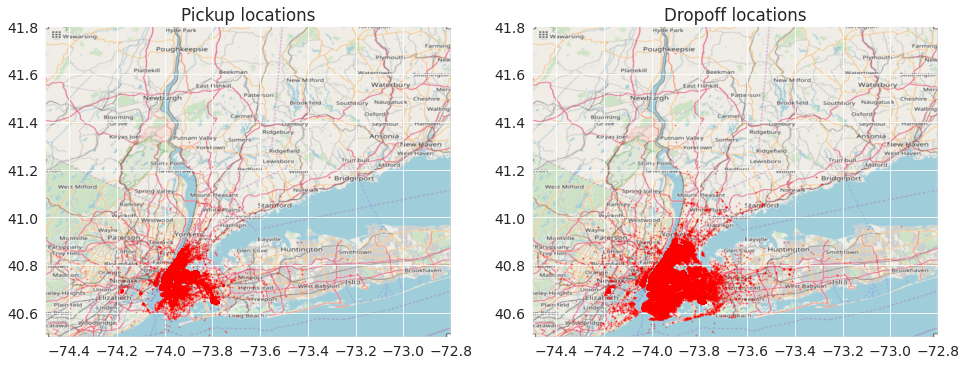

In [116]:
# plot training data on map
plot_on_map(train_df, BB, nyc_map, s=1, alpha=0.3)

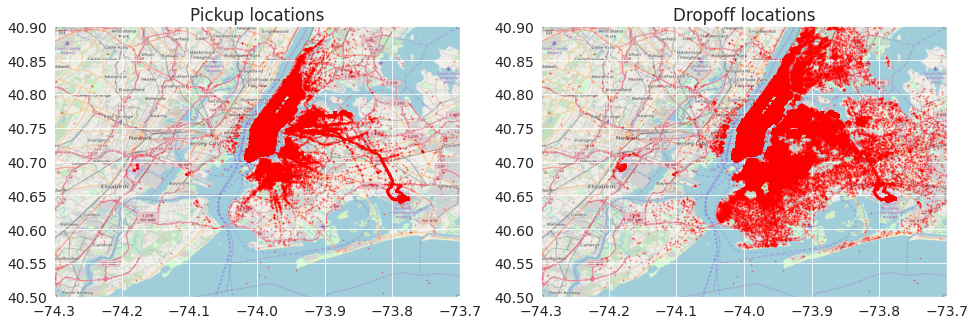

In [117]:
# plot training data on map zoomed in
plot_on_map(train_df, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

As seen in the above plot, drop-off locations in Brooklyn, Queens, and the Bronx are more dispersed than those in Manhattan.

#### Distribution of pickup_datetime and dropoff_datetime


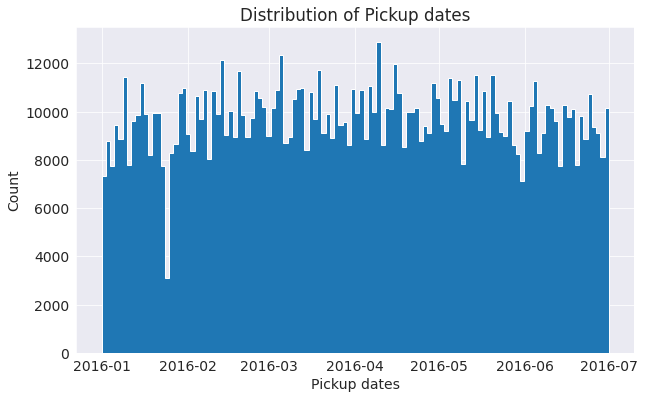

In [78]:
plt.hist(train_df['pickup_datetime'], bins=120, histtype = 'stepfilled')
plt.ylabel('Count')
plt.xlabel('Pickup dates')
plt.title('Distribution of Pickup dates');

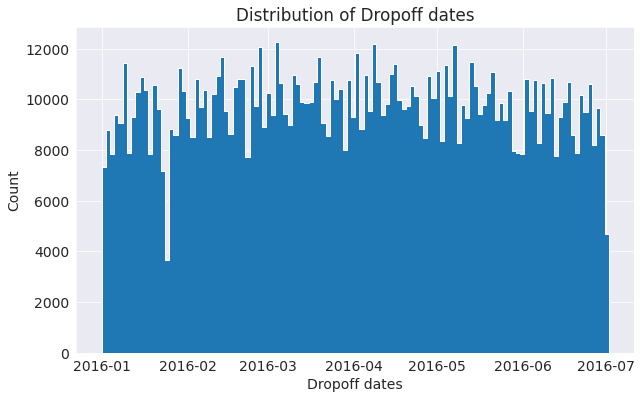

In [79]:
plt.hist(train_df['dropoff_datetime'], bins=120, histtype ='stepfilled')
plt.ylabel('Count')
plt.xlabel('Dropoff dates')
plt.title('Distribution of Dropoff dates');

There is an interesting drop around late January and early February. This may be due to snow or other adverse weather conditions.

#### Which hours are pickup and dropoff higher?

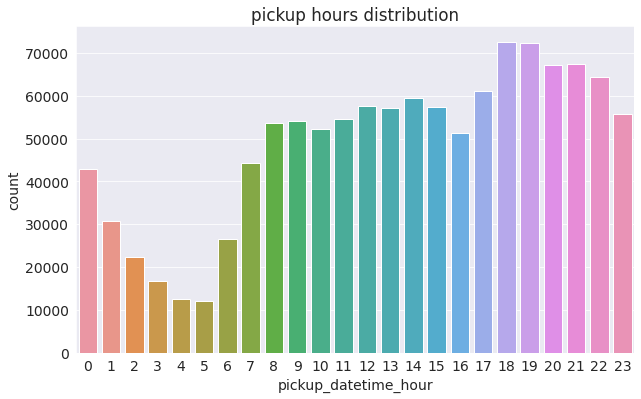

In [80]:
sns.countplot(x= train_df['pickup_datetime_hour']).set_title('pickup hours distribution');

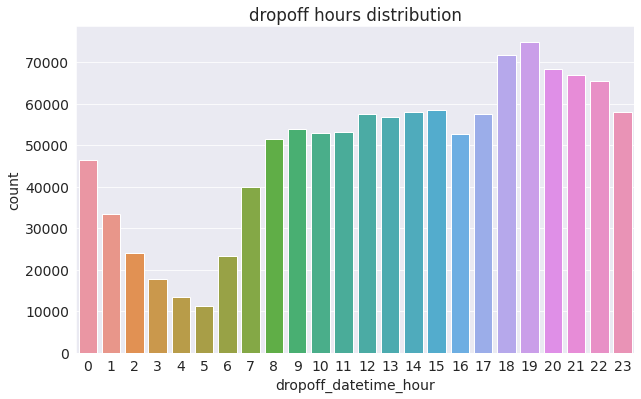

In [81]:
sns.countplot(x= train_df['dropoff_datetime_hour']).set_title('dropoff hours distribution');

As expected, pick up and drop off's are higher through out the day and night time as compared to early morning hours.

#### Which day of the week has higher trip duration?

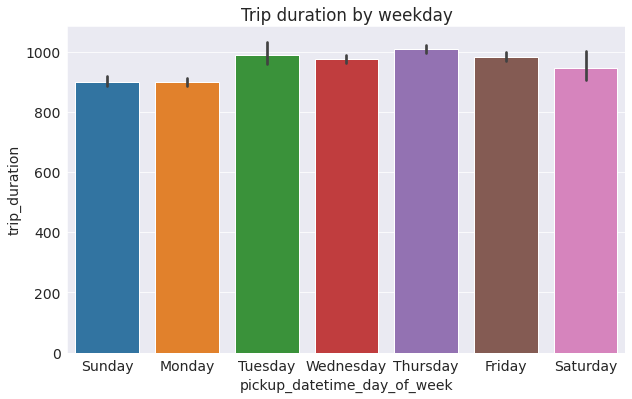

In [82]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] # sorting the day of the week
sns.barplot(data=train_df, x='pickup_datetime_day_of_week', y='trip_duration', order=order).set(title='Trip duration by weekday');

Trip duration is highest on Thursday's and Sunday's are the quickest.

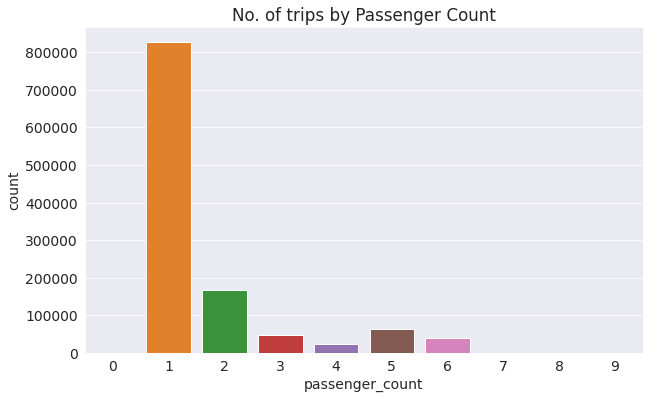

In [83]:
pass1_df = train_df.groupby(['passenger_count'])['id'].count() # create df and grouping the df by passenger count, counting numberof id's
pass2_df = pass1_df.reset_index() #resetting the df

sns.barplot(x=pass2_df.passenger_count, y=pass2_df.id)
plt.xlabel('passenger_count')
plt.ylabel('count')
plt.title('No. of trips by Passenger Count');

Majority of the rides has only one passenger, where there are fewer trips with zero, or seven to nine passengers.

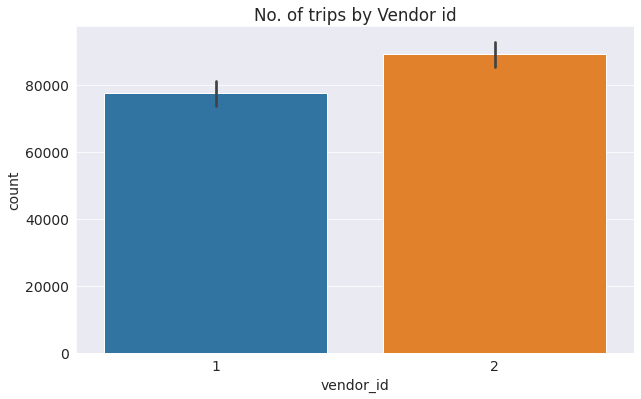

In [84]:
ven1_df = train_df.groupby(['vendor_id', 'pickup_datetime_day_of_week'])['id'].count() # create df and grouping the df by vendor id, counting numberof id's
ven2_df = ven1_df.reset_index() #resetting the df

sns.barplot(x=ven2_df.vendor_id, y=ven2_df.id)
plt.xlabel('vendor_id')
plt.ylabel('count')
plt.title('No. of trips by Vendor id');

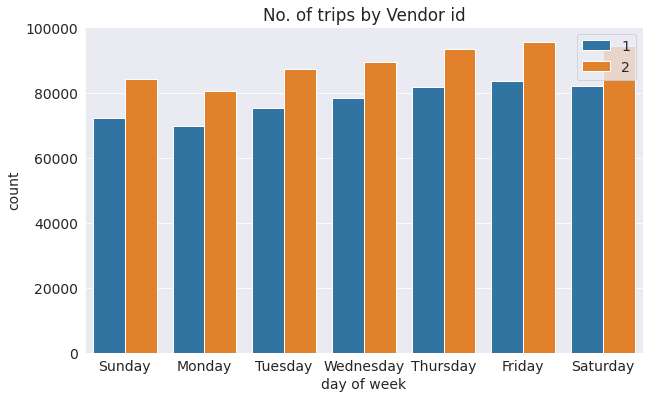

In [85]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] # sorting the day of the week
ax = sns.barplot(data=ven2_df, x='pickup_datetime_day_of_week', y='id', hue='vendor_id', order=order)
ax.set_xlabel('day of week')
ax.set_ylabel('count')
ax.legend (loc="upper right")
ax.set_title('No. of trips by Vendor id');

Overall, Vendor 2 has significantly more trips compare to vendor 1 and this is also true for everyday of the week.

Let's remove outliers before evaluating our models.

In [86]:
# function to remove outliers
def remove_outliers(df):
  return df[(df['trip_duration'] < 5900) &
            (df['passenger_count'] > 0) &
            (df['trip_distance'] < 200) &
            (df['pickup_longitude'] > -100) &
            (df['pickup_longitude'] < 50)]

In [87]:
train_df = remove_outliers(train_df)
val_df = remove_outliers(val_df)

### Split Inputs & Targets

In [88]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_datetime_year', 'pickup_datetime_month',
       'pickup_datetime_day', 'pickup_datetime_weekday',
       'pickup_datetime_hour', 'pickup_datetime_week',
       'pickup_datetime_minute', 'pickup_datetime_minute_oftheday',
       'pickup_datetime_day_of_week', 'dropoff_datetime_year',
       'dropoff_datetime_month', 'dropoff_datetime_day',
       'dropoff_datetime_weekday', 'dropoff_datetime_hour',
       'dropoff_datetime_week', 'dropoff_datetime_minute',
       'dropoff_datetime_minute_oftheday', 'dropoff_datetime_day_of_week',
       'trip_distance', 'jfk_drop_distance', 'lga_drop_distance',
       'ewr_drop_distance', 'met_drop_distance', 'wtc_drop_distance',
       'direction', 'trip_duration_in_hour', 'log_trip_duration'],
      dtype='object')

In [89]:
input_cols = ['vendor_id',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 
       'pickup_datetime_year', 'pickup_datetime_month',
       'pickup_datetime_day', 'pickup_datetime_weekday',
       'pickup_datetime_hour', 'trip_distance', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'met_drop_distance',
       'wtc_drop_distance','store_and_fwd_flag']

In [90]:
target_col = 'trip_duration'

In [91]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [92]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [ ]:
test_inputs = test_df[input_cols]

### Encode

Let's encode categorical columns as one-hot vectors.

In [ ]:
#Let's seperate numerical and categorical columns.
numeric_cols = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 
       'pickup_datetime_year', 'pickup_datetime_month',
       'pickup_datetime_day', 'pickup_datetime_weekday',
       'pickup_datetime_hour', 'trip_distance', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'met_drop_distance',
       'wtc_drop_distance']
categorical_cols = ['store_and_fwd_flag', 'vendor_id']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
train_inputs[encoded_cols].head(3) # sample view

,store_and_fwd_flag_N,store_and_fwd_flag_Y,vendor_id_1,vendor_id_2
1053743,1.0,0.0,0.0,1.0
273748,1.0,0.0,0.0,1.0
433988,1.0,0.0,0.0,1.0


In [ ]:
train_inputs = train_inputs[numeric_cols + encoded_cols]
val_inputs = val_inputs[numeric_cols + encoded_cols]
test_inputs = test_inputs[numeric_cols + encoded_cols]

Let's define a helper function to evaluate models.

In [ ]:
def evaluate(model):
  train_preds = model.predict(train_inputs)
  train_rmse = np.sqrt(mean_squared_error(train_targets, train_preds, squared=False))
  val_preds = model.predict(val_inputs)
  val_rmse = np.sqrt(mean_squared_error(val_targets, val_preds, squared=False))
  return train_rmse, val_rmse, train_preds, val_preds

Let's define a helper function to predict and submit models.

In [ ]:
#Create predict and submit model
def predict_and_submit(model, test_inputs, fname):
  test_preds = model.predict(test_inputs)
  sub_df = pd.read_csv('./nyc-taxi-trip-duration/sample_submission.zip', low_memory=False)
  sub_df['trip_duration'] = test_preds
  sub_df.to_csv(fname, index=None)
  return sub_df

# Model Selection

#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model1 = Ridge(random_state=42, alpha=0.9)

In [ ]:
model1.fit(train_inputs, train_targets)

Ridge(alpha=0.9, random_state=42)

In [ ]:
evaluate(model1)

(19.992099107484123,
 19.997205721904955,
 array([ 812.6038926 ,  861.53324769,  668.99821134, ..., 1378.97108098,
         424.12668098, 1963.04936201]),
 array([ 762.16627548,  626.67178248,  554.95856118, ...,  704.34810483,
         980.91862013, 1353.99422157]))

In [ ]:
predict_and_submit(model1, test_inputs, 'ridge_submission.csv')

,id,trip_duration
0,id3004672,811.761722
1,id3505355,699.714475
2,id1217141,686.849015
3,id2150126,1284.315230
4,id1598245,613.047859
...,...,...
625129,id3008929,392.411761
625130,id3700764,1108.970696
625131,id2568735,1349.738414
625132,id1384355,2457.249660


![Imgur](https://i.imgur.com/yxGo1uo.png)



This puts us at position ~971 out of 1254.

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=10, n_estimators = 100)

In [ ]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 36min 36s, sys: 980 ms, total: 36min 37s
Wall time: 9min 22s


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
evaluate(model2)

(17.809250755668803,
 17.959327795742368,
 array([ 833.67095274, 1034.30224523,  756.76050276, ..., 1212.70715031,
         330.970243  , 1674.54284895]),
 array([ 677.09140056,  719.54699426,  371.25242981, ...,  815.70481364,
         961.07991213, 1409.04637818]))

In [ ]:
predict_and_submit(model2, test_inputs, 'rf_submission.csv' )

,id,trip_duration
0,id3004672,813.000141
1,id3505355,725.255106
2,id1217141,495.905339
3,id2150126,1207.817308
4,id1598245,364.252482
...,...,...
625129,id3008929,346.453300
625130,id3700764,1000.551165
625131,id2568735,1562.526786
625132,id1384355,1876.181105


![Imgur](https://i.imgur.com/LsikrEY.png)

This puts us at position ~743 out of 1254.

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
gb.fit(train_inputs, train_targets)

GradientBoostingRegressor()

In [ ]:
evaluate(gb)

(18.21258934268307,
 18.262590937485413,
 array([1068.33778365, 1036.15059593,  753.50594993, ..., 1458.98935505,
         380.31680824, 1598.14146259]),
 array([ 833.82089047,  694.75414888,  427.40778452, ...,  710.24615598,
         941.64430051, 1394.00424198]))

In [ ]:
predict_and_submit(gb, test_inputs, 'gb_submission.csv' )

,id,trip_duration
0,id3004672,864.925919
1,id3505355,770.108270
2,id1217141,454.754563
3,id2150126,1199.533598
4,id1598245,366.503181
...,...,...
625129,id3008929,214.877790
625130,id3700764,1023.023617
625131,id2568735,1181.449301
625132,id1384355,1932.717906


![Imgur](https://i.imgur.com/eWw9UvJ.png)

This puts us at position ~768 out of 1254.

#### XGBRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model3 = XGBRegressor(max_depth=5, objective='reg:squarederror', n_estimators=200, random_state=42, n_jobs=-1)

In [ ]:
model3.fit(train_inputs, train_targets)

XGBRegressor(max_depth=5, n_estimators=200, n_jobs=-1,
             objective='reg:squarederror', random_state=42)

In [ ]:
evaluate(model3)

(17.04852335839235,
 17.16728543035423,
 array([ 936.6291 , 1069.8699 ,  716.51807, ..., 1672.1437 ,  338.70636,
        1700.2019 ], dtype=float32),
 array([ 802.4903 ,  812.35626,  340.97845, ...,  758.2368 ,  952.69867,
        1224.027  ], dtype=float32))

In [ ]:
predict_and_submit(model3, test_inputs, 'xgb_submission.csv')

,id,trip_duration
0,id3004672,888.374084
1,id3505355,712.242798
2,id1217141,433.486176
3,id2150126,1158.958130
4,id1598245,336.855011
...,...,...
625129,id3008929,334.886597
625130,id3700764,1139.779297
625131,id2568735,1511.708374
625132,id1384355,2114.896240


![Imgur](https://i.imgur.com/dSVMVQ6.png)

This puts us at position ~681 out of 1254.

## Tune Hyperparameters

Let's define a heler function for trying different hyperparameters.

In [ ]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = np.sqrt(mean_squared_error(model.predict(train_inputs), train_targets, squared=False))
    val_rmse = np.sqrt(mean_squared_error(model.predict(val_inputs), val_targets, squared=False))
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
best_params = {
    'random_state' : 42,
    'n_jobs' : -1,
   'objective' : 'reg:squarederror',
    'learning_rate' : 0.05
}

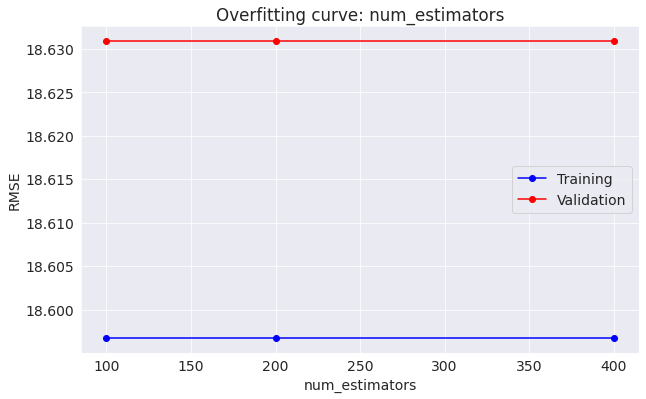

In [ ]:
test_param_and_plot(XGBRegressor, 'num_estimators', [100, 200, 400], **best_params)

In [ ]:
best_params['num_estimators'] = 100

##### Max Depth

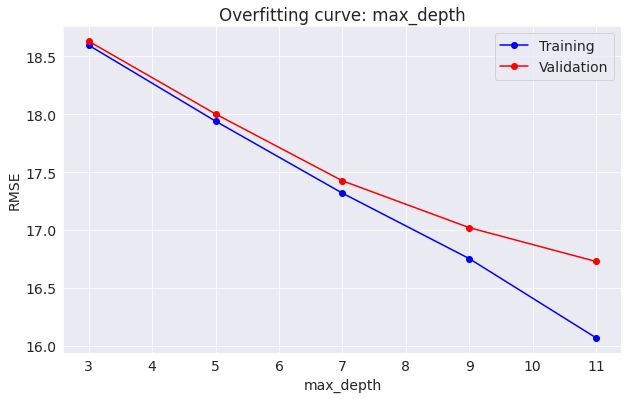

In [ ]:
test_param_and_plot(XGBRegressor, 'max_depth', [3, 5, 7, 9, 11], **best_params)

Looks like a max depth of 7 is ideal.

In [ ]:
best_params['max_depth'] = 12

##### Learning Rate

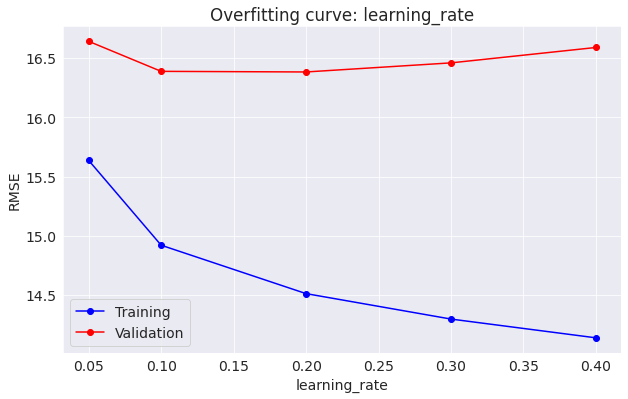

In [ ]:
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.2, 0.3, 0.4], **best_params)

seems like the best learning rate is 0.20

In [ ]:
best_params['learning_rate'] = 0.2

##### Other Parameters

In [ ]:
xgb_model_final = XGBRegressor(objective='reg:squarederror',
                               n_jobs=-1,
                               random_state=42,
                               n_estimators=800,
                               max_depth=12,
                               learning_rate=0.09,
                               )

In [ ]:
xgb_model_final.fit(train_inputs, train_targets)

XGBRegressor(learning_rate=0.09, max_depth=12, n_estimators=800, n_jobs=-1,
             objective='reg:squarederror', random_state=42)

In [ ]:
evaluate(xgb_model_final)

(13.448238715805532,
 16.21330052787712,
 array([ 918.2739 , 1033.8434 ,  648.9938 , ..., 1621.8348 ,  372.93384,
        1504.6542 ], dtype=float32),
 array([ 892.5345 ,  745.77734,  424.6433 , ...,  770.7197 ,  974.36304,
        1304.7117 ], dtype=float32))

In [ ]:
predict_and_submit(xgb_model_final, test_inputs, 'xgb_tuned_submission.csv')

,id,trip_duration
0,id3004672,864.043640
1,id3505355,727.497437
2,id1217141,451.088226
3,id2150126,993.426208
4,id1598245,395.438019
...,...,...
625129,id3008929,299.276337
625130,id3700764,1360.980835
625131,id2568735,1953.680054
625132,id1384355,1884.402588


![Imgur](https://i.imgur.com/mT1cQk3.png)

This puts us at position ~549 out of 1254.

#### LightGBM

In [ ]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()
lgbm.fit(train_inputs, train_targets)
print(lgbm.score(train_inputs, train_targets), lgbm.score(val_inputs, val_targets))

0.7935947368302134 0.7901173136679804


In [ ]:
evaluate(lgbm)

(17.160323782912613,
 17.241136641298997,
 array([ 864.06020443, 1057.58081422,  693.34574667, ..., 1578.09963397,
         331.69502699, 1560.71690214]),
 array([ 882.5563394 ,  723.46254312,  340.74313335, ...,  721.1632616 ,
        1018.63955941, 1280.61688902]))

In [ ]:
#Test the following parameters
lgb_params = {
    'objective': 'regression',
    'metric' : 'rmse',
    'learning_rate': 0.1,
    'max_depth': 25,
    'num_leaves': 1000, 
    'feature_fraction': 0.9,
    'bagging_fraction': 0.3,
    'max_bin': 1000}


In [ ]:
lgb_model = lgb.LGBMRegressor(**lgb_params)

In [ ]:
lgb_model.fit(train_inputs, train_targets)

LGBMRegressor(bagging_fraction=0.3, feature_fraction=0.9, max_bin=1000,
              max_depth=25, metric='rmse', num_leaves=1000,
              objective='regression')

In [ ]:
evaluate(lgb_model)

(15.223435074864426,
 16.220215001435545,
 array([ 985.09664727,  954.54174107,  704.11020969, ..., 1686.46739494,
         348.61347178, 1517.36005818]),
 array([ 805.29481555,  773.11533428,  408.84700169, ...,  724.30612707,
        1033.13354174, 1251.85031301]))

In [ ]:
predict_and_submit(lgb_model, test_inputs, 'lgb_submission.csv')

,id,trip_duration
0,id3004672,855.355874
1,id3505355,695.925401
2,id1217141,425.256707
3,id2150126,1130.704226
4,id1598245,381.409113
...,...,...
625129,id3008929,355.236072
625130,id3700764,1261.122304
625131,id2568735,1867.256580
625132,id1384355,1913.565605


## Summary

* In the project, we have downloaded the dataset from Kaggle using opendataset library.
* After downloading the dataset, we performed data preparation and cleaning. We changed the dtype of the datetime columns.
* After data preparation, we created new columns like "pickup_day", "pickup_month" etc from datetime column and also calculated a column "distance" from latitude and longitude by performing feature engineering.
* We performed EDA on the training dataset.
* We prepared the dataset for machine learning.
* Predicted the trip duration using basic model, linear regression, random forest, XGBRegressor & LightGBM. Here's the summary
* Best performing model highlighted below
![Imgur](https://i.imgur.com/Kx90WsY.png)

* Created a submission csv file and submitted in Kaggle competition.

## Future work

* To get into top 25% rank in Kaggle. 
* Using external dataset like NYC weather, fastest routes or NYC traffic dataset to analyse their impect on trip duration prediction.
* Creating more columns using feature engineering. E.g. travel speed etc.
* Using other ML models like K-fold, neural network regression, Lasso regression etc.

## Reference

* https://github.com/JovianML/opendatasets
* https://jovian.ai/learn/zero-to-data-analyst-bootcamp
* https://www.kaggle.com/c/nyc-taxi-trip-duration
* https://www.kaggle.com/hyunhp/eda-baseline-model-by-aiswarya
* https://www.kaggle.com/headsortails/nyc-taxi-eda-update-the-fast-the-curious
* https://en.wikipedia.org/wiki/Haversine_formula
* https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
* https://jovian.ai/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fbreemen%2Fnyc-taxi-fare-data-exploration



In [ ]:
jovian.commit()